## House Prices: Advanced Regression Techniques

**본 프로젝트는 주어진 집(house) 관련 데이터를 토대로 집 값을 예측하는 회귀(Regression) 분석 및 예측 대회입니다.**


다음의 기술 및 분석 능력을 통해 보다 정확한 예측 성능(performance)을 기대할 수 있습니다.

* 데이터 전처리 (preprocessing)를 통하여, 결측치 처리
* 시각화
* **모델 앙상블(model ensemble)**을 통해 예측 성능 향상

### 대회 소개

[원문]

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

[번역]

집 구매자에게 꿈의 집을 묘사해달라고 물어본다면, 그들은 지하실 천장 높이나 '동서(east-west) 철도와의 근접성'이라고 대답하지는 않을 것입니다. 그런데 본 데이터 세트는 앞서 얘기한 요소들이 침실 수 또는 하얀 울타리보다 가격 협상에 훨씬 더 많은 영향을 준다는 것을 알 수 있게됩니다.

본 프로젝트는 **79개의 다양한 집을 묘사할 수 있는 데이터 요소들을 기반으로, 각각의 집들에 대하여 최종 집값을 예측**해 주길 기대합니다.

### 모델 향상 (점수 개선)을 위한 주요 tip

1. 데이터에는 결측치도 굉장히 많이 존재하고, 이상치(outlier)도 존재합니다. 실전 데이터를 통해 이를 잘 처리해 주어야먄 좋은 점수를 기대할 수 있습니다.
2. 다양한 모델들의 앙상블을 통해 획기적인 점수 개선을 눈으로 직접 확인할 수 있습니다. 좋은 모델을 선정하고, baggine, boosting, stacking 등의 앙상블 기법을 통해 점수 개선을 기대해 봅니다.

### 데이터 소개

* train.csv: 학습을 위하여 활용되는 데이터 셋입니다.
* test.csv: 테스트를 위하여 제공되는 데이터 셋입니다. 본 파일 데이터를 기반으로 예측하여 집값을 예측합니다.
* submission.csv: 예측한 집값 데이터를 submission 파일에 작성한 후 제출합니다.

### train.csv column 소개

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import pickle

%matplotlib inline
warnings.filterwarnings('ignore')

# pickle savedata
def save_data(df, filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "wb" ) as file:
        pickle.dump(df, file)

# pickle load data
def load_data(filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "rb" ) as file:
        return pickle.load(file)
    
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
train = train.drop('Id', 1)
test = test.drop('Id', 1)

In [4]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [5]:
all_data = pd.concat([train, test], sort=False)

In [6]:
all_data = all_data.reset_index(drop=True)

In [7]:
all_data.shape

(2919, 80)

In [8]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Fill out NaN Values

In [9]:
num_col = all_data.select_dtypes(exclude='object').drop('SalePrice', 1).columns

In [10]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Correct false data of PoolQC

In [11]:
all_data.loc[(all_data['PoolArea']>0) & (all_data['PoolQC'].isnull()), ['OverallQual', 'PoolQC']]

,OverallQual,PoolQC
2420,4,NaN
2503,6,NaN
2599,3,NaN


In [12]:
all_data.loc[2420, 'PoolQC'] = 'Fa'
all_data.loc[2503, 'PoolQC'] = 'Gd'
all_data.loc[2599, 'PoolQC'] = 'Fa'

Correct false data of GarageYrBlt

In [13]:
all_data.loc[all_data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [14]:
all_data.loc[(all_data['GarageType'].notnull()) & (all_data['GarageYrBlt'].isnull()), 'YearRemodAdd']

2126    1983
2576    1999
Name: YearRemodAdd, dtype: int64

In [15]:
all_data.loc[2126, "GarageYrBlt"] = 1983.0
all_data.loc[2576, "GarageYrBlt"] = 1999.0

all_data.loc[2126, "GarageFinish"] = "RFn"
all_data.loc[2576, "GarageFinish"] = "Fin"

all_data.loc[[2126, 2576], ["GarageCond","GarageQual"]] = "TA"

all_data.loc[2576, "GarageCars"] = 2.0 #중앙값
all_data.loc[2576, "GarageArea"] = 480.0 #평균

In [16]:
all_data.loc[332, "BsmtFinType2"] = "Unf"

In [17]:
all_data.loc[2217, "BsmtQual"] = "Fa"
all_data.loc[2218, "BsmtQual"] = "Fa"

In [18]:
all_data.loc[948, "BsmtExposure"] = "Gd"
all_data.loc[1487, "BsmtExposure"] = "Av"
all_data.loc[2348, "BsmtExposure"] = "Mn"

In [19]:
all_data.loc[2040, "BsmtCond"] = "Gd"
all_data.loc[2185, "BsmtCond"] = "Fa"
all_data.loc[2524, "BsmtCond"] = "TA"

In [20]:
all_data.loc[773, "MasVnrArea"] = 0
all_data.loc[1230, "MasVnrArea"] = 0
all_data.loc[2452, "MasVnrArea"] = 0

In [21]:
all_data.loc[624, "MasVnrType"] = "BrkFace"
all_data.loc[1300, "MasVnrType"] = "BrkFace"
all_data.loc[1334, "MasVnrType"] = "BrkFace"
all_data.loc[1669, "MasVnrType"] = "Stone"
all_data.loc[2610, "MasVnrType"] = "BrkFace"

In [22]:
all_data.loc[1915, "MSZoning"] = "RL"
all_data.loc[2216, "MSZoning"] = "RL"
all_data.loc[2250, "MSZoning"] = "RL"
all_data.loc[2904, "MSZoning"] = "RL"

In [23]:
all_data.loc[2216, "Functional"] = "Maj1"
all_data.loc[2473, "Functional"] = "Maj1"

In [24]:
all_data.loc[1379, "Electrical"] = "SBrkr"

In [25]:
all_data.loc[1555, "KitchenQual"] = "TA"

In [26]:
all_data.loc[2151, "Exterior1st"] = "Plywood"
all_data.loc[2151, "Exterior2nd"] = "Plywood"

In [27]:
all_data.loc[2489, "SaleType"] = "WD"

In [28]:
all_data.loc[635, "TotRmsAbvGrd"] = 8

In [29]:
all_data.loc[873, "MiscVal"] = 4333
all_data.loc[1200, "MiscVal"] = 500
all_data.loc[2431, "MiscVal"] = 500
all_data.loc[2549, "MiscVal"] = 0

In [30]:
all_data.loc[1876, "YearRemodAdd"] = 2002.0

In [31]:
all_data.loc[523, "YrSold"] = 2008
all_data.loc[2295, "YrSold"] = 2008
all_data.loc[2549, "YrSold"] = 2009

In [32]:
num_nan_cols =[
    'MasVnrArea',
    'GarageYrBlt',
    'BsmtFullBath',
    'BsmtHalfBath',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'GarageCars',
    'GarageArea',
]

In [33]:
for col in num_nan_cols:
    all_data[col].fillna(train[col].mode()[0], inplace=True)

In [34]:
all_data[num_col].isnull().sum().sort_values(ascending=False).head()

YrSold          0
MoSold          0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

## Produce numerical col -> bool col

In [35]:
all_data['WoodDeckSF_bool'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

all_data['OpenPorchSF_bool'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

all_data['EnclosedPorch_bool'] = all_data['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)

all_data['3SsnPorch_bool'] = all_data['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)

all_data['ScreenPorch_bool'] = all_data['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)

all_data['PoolArea_bool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

all_data['FirePlaces_bool'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Outliers

In [36]:
t_col = [
    'GrLivArea',
    'TotalBsmtSF',
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
]

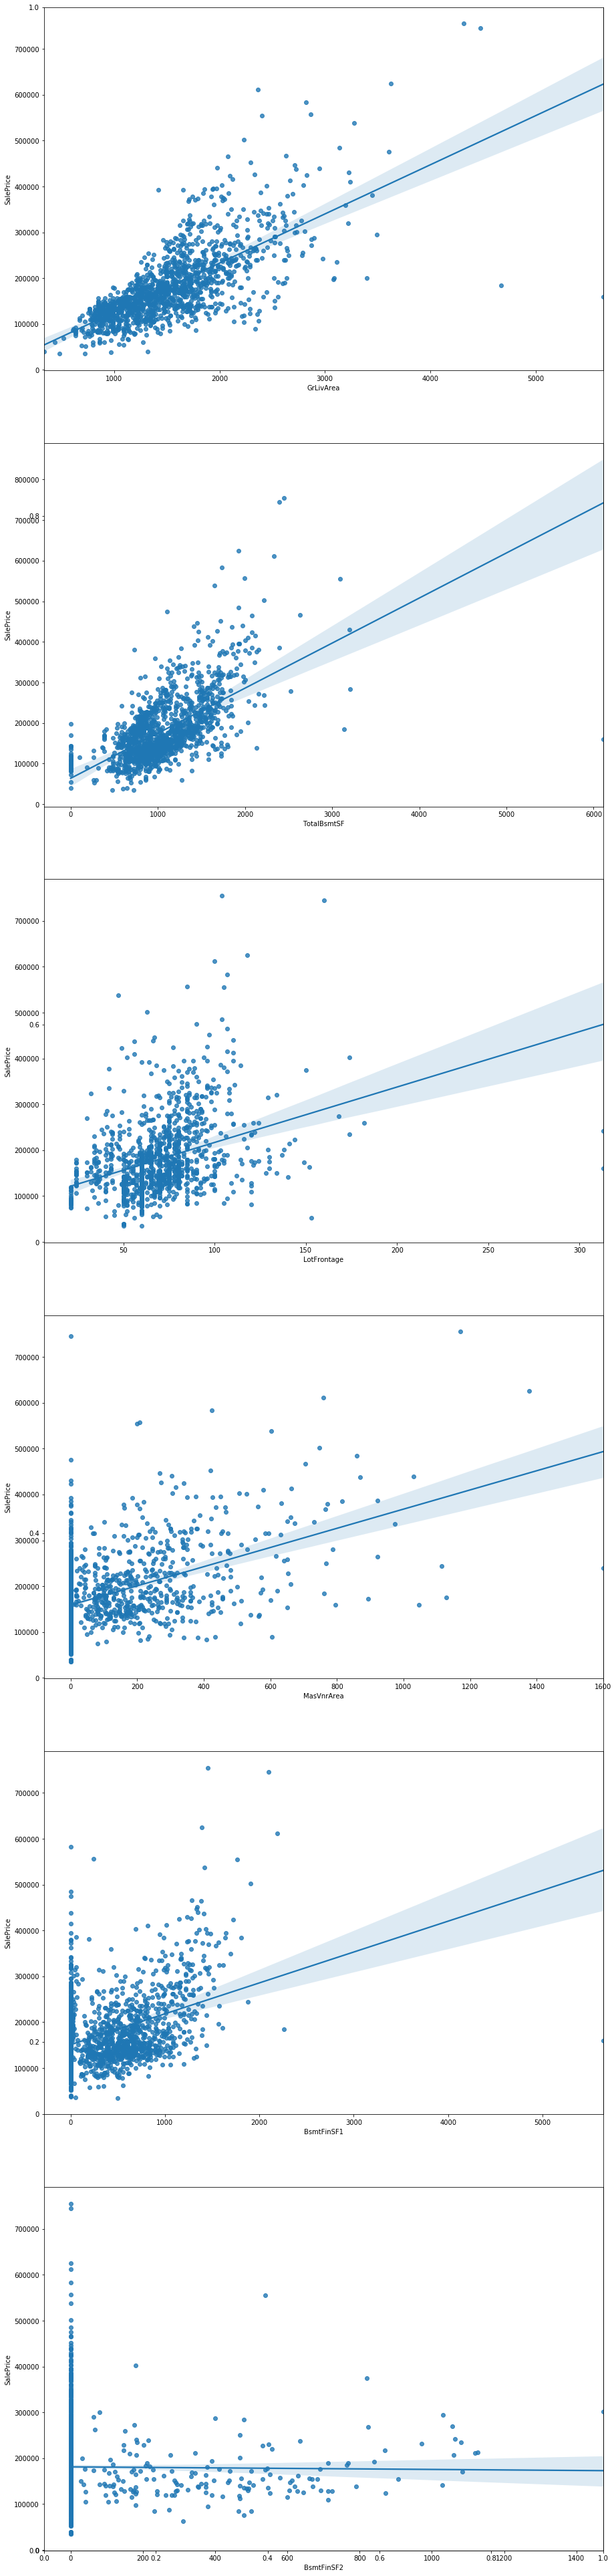

In [37]:
fg, ax = plt.subplots(figsize=(15, 70))
for i, c in enumerate(t_col):
    fg.add_subplot(6, 1, i+1)
    sns.regplot(x=train[c], y=train['SalePrice'])

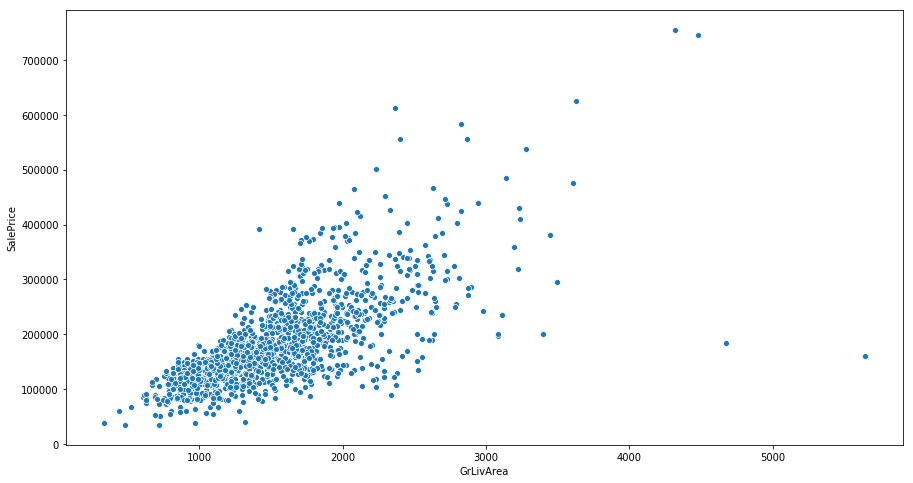

In [38]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [39]:
len(num_col)

36

## Explore Categorical Data

In [40]:
cat_col = all_data.select_dtypes(include='object').columns

In [41]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
len(cat_col), len(num_col)

(43, 36)

## Explore NaN Values

In [43]:
cat_nan_col = [col for col in cat_col if all_data[col].isnull().sum() > 0]

In [44]:
for col in cat_nan_col:
    all_data[col].fillna('None', inplace=True)

## Produce bool column

**bool**
* Alley
* MiscFeature

In [45]:
all_data['Alley_bool'] = all_data['Alley'].apply(lambda x: 0 if x == 'None' else 1)

In [46]:
all_data['MiscFeature_bool'] = all_data['MiscFeature'].apply(lambda x: 0 if x == 'None' else 1)

## Produce clean column

**clean**
* Electrical
* Functional
* RoofMatl
* GarageQual
* Exterior1st
* Exterior2nd
* SaleType

In [47]:
all_data['Electrical_clean'] = all_data['Electrical'].apply(lambda x: x if x == 'SBrkr' else 'Fuse')

all_data['Functional_clean'] = all_data['Functional'].apply(lambda x: x if x =='Typ' else 'Other')

all_data['RoofMatl_clean'] = all_data['RoofMatl'].apply(lambda x: x if x == 'CompShg' else 'Other')

all_data['GarageQual_clean'] = all_data['GarageQual'].apply(lambda x: x if x == 'TA' else 'Other')

In [51]:
ext_other = [
    'Stone',
    'AsphShn',
    'Other',
    'CBlock',
    'ImStucc',
    'Brk Cmn',
    'BrkComm',
    'None',
]

In [52]:
all_data['Exterior1st_clean'] = all_data['Exterior1st'].apply(lambda x: 'Other' if x in ext_other else x)

In [53]:
all_data['Exterior2nd_clean'] = all_data['Exterior2nd'].apply(lambda x: 'Other' if x in ext_other else x)

In [54]:
saletype_other = [
    'ConLD',
    'ConLw',
    'ConLI',
    'CWD',
    'Oth',
    'Con',
    'None'
]

In [55]:
all_data['SaleType_clean'] = all_data['SaleType'].apply(lambda x: x if x not in saletype_other else 'Other')

## Add Column (Further Tuning)

In [56]:
all_data['LotArea_log'] = np.log1p(all_data['LotArea'])

In [57]:
all_data['GrLivArea_TotalBsmtSF_GarageArea_sum'] = all_data['GrLivArea'] + all_data['TotalBsmtSF'] +all_data['GarageArea']
all_data['LotArea_log_GTGs_mul'] = all_data['LotArea_log'] * all_data['GrLivArea_TotalBsmtSF_GarageArea_sum']

## Sum cols

In [58]:
all_data['OtherArea'] = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

In [59]:
all_data['Total_sqr_area'] = all_data['BsmtFinSF1'] \
                            + all_data['BsmtFinSF2'] \
                            + all_data['1stFlrSF'] \
                            + all_data['2ndFlrSF']

In [60]:
all_data['FullBath_count'] = all_data['BsmtFullBath'] + all_data['FullBath']
all_data['HalfBath_count'] = all_data['HalfBath'] + all_data['BsmtHalfBath']

## Mean cols

In [61]:
all_data['Overall_sum'] = all_data['OverallCond']+ all_data['OverallQual']

## Mul cols

In [62]:
all_data['GrLivArea_OverallQual_mul'] = all_data['GrLivArea_TotalBsmtSF_GarageArea_sum'] * all_data['OverallQual'].astype(int)

In [63]:
# all_data['GrLivArea_OverallCond_mul'] = all_data['GrLivArea_TotalBsmtSF_GarageArea_sum'] * all_data['OverallCond'].astype(int)

## Check Up Values

In [64]:
cat_col = train.select_dtypes(include='object').columns

In [65]:
all_data.isnull().sum().sort_values(ascending=False).head()

SalePrice                    1459
GrLivArea_OverallQual_mul       0
TotalBsmtSF                     0
ExterCond                       0
Foundation                      0
dtype: int64

## Save Data

In [66]:
to_remove = [
    'Utilities',
    'Street',
    'SalePrice',
    'PoolQC',
    'Id',
]

## Finish Up

In [67]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')

In [68]:
all_data['MoSold'] = all_data['MoSold'].astype('str')
all_data['YrSold'] = all_data['YrSold'].astype('str')

In [69]:
cat_cols = all_data.select_dtypes(include='object').columns

In [70]:
all_data.shape

(2919, 105)

In [71]:
len(train)

1460

In [72]:
train = all_data[:len(train)]
test = all_data[len(train):]

In [73]:
train['GrLivArea'].sort_values(ascending=False)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
        ... 
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1460, dtype: int64

In [74]:
train = train.drop([1298, 523])

In [75]:
train.shape, test.shape

((1458, 105), (1459, 105))

## Drop Columns

In [76]:
useless_remove = [
    'Utilities',
    'Street',
    'SalePrice',
    'PoolQC',
    'Id',
]

In [77]:
to_remove = useless_remove

## Removing Unuse cols

In [78]:
use_col = [col for col in train.columns if col not in to_remove]

In [79]:
train_copy = train.copy()
test_copy = test.copy()

In [80]:
train_copy = train_copy[use_col]
test_copy = test_copy[use_col]

## One Hot Encoding

In [81]:
all_data = pd.concat([train_copy, test_copy], sort=False)

In [82]:
all_data = pd.get_dummies(all_data)

In [83]:
overfit = {}
for col in all_data.columns:
    counts = all_data[col].value_counts()
    zeros = counts.iloc[0]
    zero_pct = zeros / len(all_data) * 100
    overfit[col] = zero_pct

In [84]:
zdf = pd.DataFrame(data=overfit.values(), index=overfit.keys(), columns=['zeros'])
zdf.sort_values('zeros', ascending=False)

,zeros
Electrical_Mix,99.965718
MSSubClass_150,99.965718
Exterior2nd_Other,99.965718
Exterior1st_ImStucc,99.965718
RoofMatl_Roll,99.965718
...,...
GrLivArea,1.405554
GrLivArea_TotalBsmtSF_GarageArea_sum,0.479945
GrLivArea_OverallQual_mul,0.445663
Total_sqr_area,0.445663


In [85]:
drop_idx = zdf.loc[zdf['zeros'] > 99].index

In [86]:
features = [col for col in all_data.columns if col not in drop_idx]

In [87]:
all_data = all_data[features]

In [88]:
all_data.shape

(2917, 285)

In [89]:
all_data.fillna(0, inplace=True)

In [90]:
x_train = all_data[:len(train_copy)]
x_test = all_data[len(train_copy):]

In [91]:
x_train.shape, x_test.shape

((1458, 285), (1459, 285))

In [92]:
y_train = np.log1p(train['SalePrice'])

## Find Outliers

In [93]:
# import statsmodels.api as sm

# ols = sm.OLS(endog =y_train, exog = x_train)
# fit = ols.fit()
# test2 = fit.outlier_test()['bonf(p)']

In [94]:
# list(test2[test2<1e-3].index)

## Scoring

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [96]:
x_tr, x_te, y_tr, y_te = train_test_split(x_train, y_train, random_state=30)

In [97]:
def get_score(model):
    pred = model.fit(x_tr, y_tr).predict(x_te)
    return np.sqrt(mean_squared_error(np.expm1(pred), np.expm1(y_te)))

## Modeling

In [98]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from mlxtend.regressor import StackingCVRegressor

In [99]:
kf = KFold(random_state=30, 
           n_splits=10, 
           shuffle=True)

In [100]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [101]:
ridgeCV = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kf))
lassoCV = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))
elasticnetCV = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [102]:
lgbm = LGBMRegressor(objective='regression', 
                     learning_rate=0.01, 
                     num_leaves=4,                 
                     n_estimators=5000,
                     max_bin=200, 
                     bagging_fraction=0.75,
                     bagging_freq=5, 
                     bagging_seed=7,
                     feature_fraction=0.2,
                     feature_fraction_seed=7,
                     verbose=-1,
                    )
print("lgbm   : {0:.2f}, ".format(get_score(lgbm)))

lgbm   : 26008.76, 


In [103]:
xgb = XGBRegressor(learning_rate=0.01,
                   n_estimators=3460,
                   max_depth=3, 
                   min_child_weight=0,
                   gamma=0, 
                   subsample=0.7,
                   colsample_bytree=0.7,
                   objective='reg:squarederror', 
                   nthread=-1,
                   scale_pos_weight=1, 
                   seed=27,
                   reg_alpha=0.00006)
%time print("xgb   : {0:.2f}, ".format(get_score(xgb)))

xgb   : 25369.00, 
CPU times: user 1min 21s, sys: 252 ms, total: 1min 21s
Wall time: 2.79 s


In [104]:
gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber', 
                                random_state =42)   
print("gbr   : {0:.2f}, ".format(get_score(gbr)))

gbr   : 24772.74, 


In [105]:
stack_reg = StackingCVRegressor(regressors=(ridgeCV, lassoCV, elasticnetCV, gbr, xgb, lgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True, n_jobs=-1)

## Evaluation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
def print_score(model, name):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring='neg_mean_squared_error', 
                             cv=10
                            )
    print("model: {0} =====> mean: {1:.3f}, std: {2:.3f}, score: {3:.3f}".format(name, 
                                                                                 np.sqrt(-scores).mean(), 
                                                                                 np.sqrt(-scores).std(), 
                                                                                 get_score(model))
         )

## 모델 앙상블 (Ensemble)

In [108]:
models = {
    'lassoCV': lassoCV,
    'ridgeCV': ridgeCV,
    'elasticnetCV': elasticnetCV,
    'lgbm': lgbm,
    'xgb': xgb,
    'gbr': gbr,
    'stack_reg': stack_reg,
}

In [109]:
lassoCV_pred = lassoCV.fit(x_train, y_train).predict(x_test)
lassoCV_pred = np.expm1(lassoCV_pred)

In [110]:
ridgeCV_pred = ridgeCV.fit(x_train, y_train).predict(x_test)
ridgeCV_pred = np.expm1(ridgeCV_pred)

In [111]:
elasticnetCV_pred = elasticnetCV.fit(x_train, y_train).predict(x_test)
elasticnetCV_pred = np.expm1(elasticnetCV_pred)

In [112]:
lgbm_pred = lgbm.fit(x_train, y_train).predict(x_test)
lgbm_pred = np.expm1(lgbm_pred)

In [113]:
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)
xgb_pred = np.expm1(xgb_pred)

In [114]:
gbr_pred = gbr.fit(x_train, y_train).predict(x_test)
gbr_pred = np.expm1(gbr_pred)

In [115]:
svr_pred = svr.fit(x_train, y_train).predict(x_test)
svr_pred = np.expm1(svr_pred)

In [116]:
stack_pred = stack_reg.fit(np.array(x_train), np.array(y_train)).predict(np.array(x_test))
stack_pred = np.expm1(stack_pred)

In [117]:
prediction = ((0.1 * elasticnetCV_pred) + \
            (0.05 * lassoCV_pred) + \
            (0.1 * ridgeCV_pred) + \
            (0.1 * svr_pred) + \
            (0.1 * gbr_pred) + \
            (0.15 * xgb_pred) + \
            (0.05 * lgbm_pred) + \
            (0.35 * stack_pred))

In [118]:
# print(np.sqrt(((prediction - target)**2).mean()).round(2))
print(prediction[1089].round(2))
# 999506.93 <=== BEST SCORED OUTLIER
# scored: 12313

983394.2


## Make Submission

In [119]:
from datetime import datetime

t = datetime.now().strftime('%Y-%m-%d-%H-%M')
filename = '{0}-submission.csv'.format(t)

In [120]:
sample_submission['SalePrice'] = prediction

In [121]:
sample_submission.to_csv(filename, index=False)